In [31]:
import numpy as np
from PIL import Image
import os
from scipy import signal

# read lena.bmp
sample_img = Image.open('lena.bmp')
sample_arr = np.array(sample_img).astype(int)

# build output directory
if not os.path.exists('results'):
    os.mkdir('results')

In [26]:
# define function
def binarize(img, thr):
    img_bin = np.zeros(img.shape)
    img_bin[img <= thr] = 255
    return img_bin

def magnitude(Gx, Gy):
    return np.sqrt(Gx ** 2 + Gy ** 2)
    
def roberts_operator(img):
    k1 = np.array([
        [1, 0],
        [0, -1]
    ])
    k2 = np.array([
        [0, 1],
        [-1, 0]
    ])
    return magnitude(signal.convolve2d(img, k1), signal.convolve2d(img, k2))

def prewitts_edge_detector(img):
    k1 = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    k2 = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])
    return magnitude(signal.convolve2d(img, k1), signal.convolve2d(img, k2))

def sobels_edge_detector(img):
    k1 = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    k2 = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])
    return magnitude(signal.convolve2d(img, k1), signal.convolve2d(img, k2))

def frei_and_chens_gradient_operator(img):
    k1 = np.array([
        [-1, -np.sqrt(2), -1],
        [0, 0, 0],
        [1, np.sqrt(2), 1]
    ])
    k2 = np.array([
        [-1, 0, 1],
        [-np.sqrt(2), 0, np.sqrt(2)],
        [-1, 0, 1]
    ])
    return magnitude(signal.convolve2d(img, k1), signal.convolve2d(img, k2))    

def kirschs_compass_operator(img):
    k0 = np.array([
        [-3, -3, 5],
        [-3, 0, 5],
        [-3, -3, 5]
    ])
    k1 = np.array([
        [-3, 5, 5],
        [-3, 0, 5],
        [-3, -3, -3]
    ])
    k2 = np.array([
        [5, 5, 5],
        [-3, 0, -3],
        [-3, -3, -3]
    ])
    k3 = np.array([
        [5, 5, -3],
        [5, 0, -3],
        [-3, -3, -3]
    ])
    k4 = np.array([
        [5, -3, -3],
        [5, 0, -3],
        [5, -3, -3]
    ])
    k5 = np.array([
        [-3, -3, -3],
        [5, 0, -3],
        [5, 5, -3]
    ])
    k6 = np.array([
        [-3, -3, -3],
        [-3, 0, -3],
        [5, 5, 5]
    ])
    k7 = np.array([
        [-3, -3, -3],
        [-3, 0, 5],
        [-3, 5, 5]
    ])
    return np.max(np.array(
        [signal.convolve2d(img, k0),
         signal.convolve2d(img, k1),
         signal.convolve2d(img, k2),
         signal.convolve2d(img, k3),
         signal.convolve2d(img, k4),
         signal.convolve2d(img, k5),
         signal.convolve2d(img, k6),
         signal.convolve2d(img, k7)]), axis=0)
 
def robinsons_compass_operator(img):
    k0 = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    k1 = np.array([
        [0, 1, 2],
        [-1, 0, 1],
        [-2, -1, 0]
    ])
    k2 = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])
    k3 = np.array([
        [2, 1, 0],
        [1, 0, -1],
        [0, -1, -2]
    ])
    k4 = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])
    k5 = np.array([
        [0, -1, -2],
        [1, 0, -1],
        [2, 1, 0]
    ])
    k6 = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])
    k7 = np.array([
        [-2, -1, 0],
        [-1, 0, 1],
        [0, 1, 2]
    ])
    return np.max(np.array(
        [signal.convolve2d(img, k0),
         signal.convolve2d(img, k1),
         signal.convolve2d(img, k2),
         signal.convolve2d(img, k3),
         signal.convolve2d(img, k4),
         signal.convolve2d(img, k5),
         signal.convolve2d(img, k6),
         signal.convolve2d(img, k7)]), axis=0)

def nevatia_babu_5x5_operator(img):
    k0 = -np.array([
        [100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100],
        [0, 0, 0, 0, 0],
        [-100, -100, -100, -100, -100],
        [-100, -100, -100, -100, -100],
    ])
    k1 = -np.array([
        [100, 100, 100, 100, 100],
        [100, 100, 100, 78, -32],
        [100, 92, 0, -92, -100],
        [32, -78, -100, -100, -100],
        [-100, -100, -100, -100, -100]
    ])
    k2 = -np.array([
        [100, 100, 100, 32, -100],
        [100, 100, 92, -78, -100],
        [100, 100, 0, -100, -100],
        [100, 78, -92, -100, -100],
        [100, -32, -100, -100, -100]
    ])
    k3 = np.array([
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100]
    ])
    k4 = -np.array([
        [-100, 32, 100, 100, 100],
        [-100, -78, 92, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, -92, 78, 100],
        [-100, -100, -100, -32, 100]
    ])
    k5 = -np.array([
        [100, 100, 100, 100, 100],
        [-32, 78, 100, 100, 100],
        [-100, -92, 0, 92, 100],
        [-100, -100, -100, -78, 32],
        [-100, -100, -100, -100, -100]
    ])
    return np.max(np.array(
        [signal.convolve2d(img, k0),
         signal.convolve2d(img, k1),
         signal.convolve2d(img, k2),
         signal.convolve2d(img, k3),
         signal.convolve2d(img, k4),
         signal.convolve2d(img, k5)]), axis=0)

In [35]:
PIL_image = Image.fromarray(binarize(roberts_operator(sample_arr), 12).astype('uint8'))
PIL_image.save('results/RobertsOperator.bmp')

In [36]:
PIL_image = Image.fromarray(binarize(prewitts_edge_detector(sample_arr), 24).astype('uint8'))
PIL_image.save('results/PrewittsEdgeDetector.bmp')

In [37]:
PIL_image = Image.fromarray(binarize(sobels_edge_detector(sample_arr), 38).astype('uint8'))
PIL_image.save('results/SobelsEdgeDetector.bmp')

In [38]:
PIL_image = Image.fromarray(binarize(frei_and_chens_gradient_operator(sample_arr), 30).astype('uint8'))
PIL_image.save('results/FreiAndChensGradientOperator.bmp')

In [39]:
PIL_image = Image.fromarray(binarize(kirschs_compass_operator(sample_arr), 135).astype('uint8'))
PIL_image.save('results/KirschsCompassOperator.bmp')

In [40]:
PIL_image = Image.fromarray(binarize(robinsons_compass_operator(sample_arr), 43).astype('uint8'))
PIL_image.save('results/RobinsonsCompassOperator.bmp')

In [41]:
PIL_image = Image.fromarray(binarize(nevatia_babu_5x5_operator(sample_arr), 12500).astype('uint8'))
PIL_image.save('results/NevatiaBabuOperator.bmp')

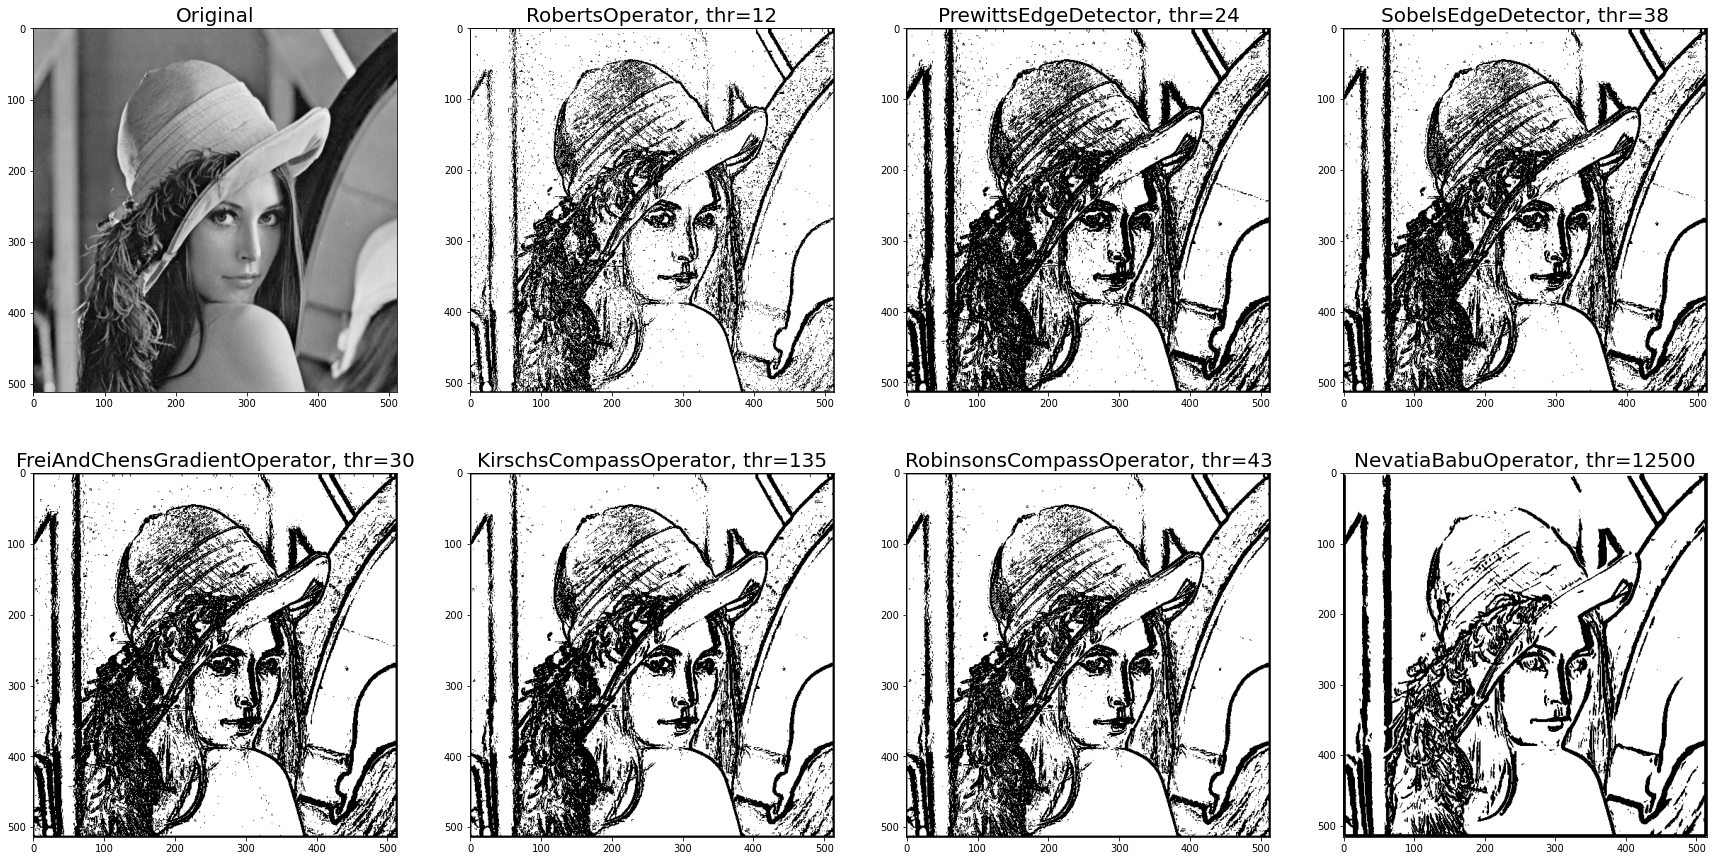

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(30, 15))

ax[0, 0].imshow(sample_arr, cmap = 'gray')
ax[0, 0].set_title('Original', fontsize=20)

ax[0, 1].imshow(binarize(roberts_operator(sample_arr), 12), cmap = 'gray')
ax[0, 1].set_title('RobertsOperator, thr=12', fontsize=20)

ax[0, 2].imshow(binarize(prewitts_edge_detector(sample_arr), 24), cmap = 'gray')
ax[0, 2].set_title('PrewittsEdgeDetector, thr=24', fontsize=20)

ax[0, 3].imshow(binarize(sobels_edge_detector(sample_arr), 38), cmap = 'gray')
ax[0, 3].set_title('SobelsEdgeDetector, thr=38', fontsize=20)
           
ax[1, 0].imshow(binarize(frei_and_chens_gradient_operator(sample_arr), 30), cmap = 'gray')
ax[1, 0].set_title('FreiAndChensGradientOperator, thr=30', fontsize=20)

ax[1, 1].imshow(binarize(kirschs_compass_operator(sample_arr), 135), cmap = 'gray')
ax[1, 1].set_title('KirschsCompassOperator, thr=135', fontsize=20)
               
ax[1, 2].imshow(binarize(robinsons_compass_operator(sample_arr), 43), cmap = 'gray')
ax[1, 2].set_title('RobinsonsCompassOperator, thr=43', fontsize=20)

ax[1, 3].imshow(binarize(nevatia_babu_5x5_operator(sample_arr), 12500), cmap = 'gray')
ax[1, 3].set_title('NevatiaBabuOperator, thr=12500', fontsize=20)

plt.show()